In [4324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import torch
from sklearn.model_selection import train_test_split
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)


Under what conditions is MLP equivalent to Logistic Regression?

اینکه مدل ما فقط یک لایه داشته باشه و لایه پنهان نداشته باشه و ورودی ها مستقیم به خروجی متصل باشند
تابع فعال‌سازی خروجی، سیگموید (برای کلاس‌بندی دودویی) یا برای چند کلاسه باشه
تابع  لوز فانکشن همان تابع کراس انتروپی باشد

In [4325]:
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Load the dataset
df = pd.read_csv("matches.csv")

# General info
print("df.shape: ", df.shape)
print("\ninfo: ")
print(df.info())

df.shape:  (17812, 19)

info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17812 entries, 0 to 17811
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    17812 non-null  int64  
 1   home_team             17812 non-null  object 
 2   home_goals            17812 non-null  int64  
 3   away_goals            17812 non-null  int64  
 4   away_team             17812 non-null  object 
 5   wcm                   17812 non-null  int64  
 6   dif_inter_match       17812 non-null  float64
 7   dif_inter_match_won   17812 non-null  float64
 8   dif_inter_match_lost  17812 non-null  float64
 9   dif_inter_match_tie   17812 non-null  float64
 10  dif_inter_goals_sco   17812 non-null  float64
 11  dif_inter_goals_con   17812 non-null  float64
 12  dif_wc_match          17812 non-null  float64
 13  dif_wc_match_won      17812 non-null  float64
 14  dif_wc_match_lost     17812 non-null  f

In [ ]:
# Check for missing values
print("\nNULL: ")
print(df.isnull().sum())

# Check label distribution
print("\n")
print(df['status'].value_counts())


NULL: 
id                      0
home_team               0
home_goals              0
away_goals              0
away_team               0
wcm                     0
dif_inter_match         0
dif_inter_match_won     0
dif_inter_match_lost    0
dif_inter_match_tie     0
dif_inter_goals_sco     0
dif_inter_goals_con     0
dif_wc_match            0
dif_wc_match_won        0
dif_wc_match_lost       0
dif_wc_match_tied       0
dif_wc_goals_sco        0
dif_wc_goals_con        0
status                  0
dtype: int64


status
1    8674
3    4927
2    4211
Name: count, dtype: int64


In [4327]:
for col in df.columns:
    if col != "id":
        print(f"\n------ {col} ------")
        print(df[col].value_counts(dropna=False))


------ home_team ------
home_team
Brazil                          564
Mexico                          538
Germany                         496
South Korea                     495
Argentina                       477
                               ... 
Timor-Leste                       1
French Guiana                     1
United States Virgin Islands      1
Cayman Islands                    1
China                             1
Name: count, Length: 216, dtype: int64

------ home_goals ------
home_goals
1     5350
0     4328
2     3929
3     2065
4     1055
5      512
6      271
7      143
8       85
9       41
10      10
11       6
12       4
13       3
14       3
16       2
17       1
19       1
22       1
31       1
15       1
Name: count, dtype: int64

------ away_goals ------
away_goals
0     6746
1     5784
2     3059
3     1298
4      536
5      201
6      101
7       45
8       22
10       8
9        6
11       2
13       2
12       1
17       1
Name: count, dtype: int64

------ 

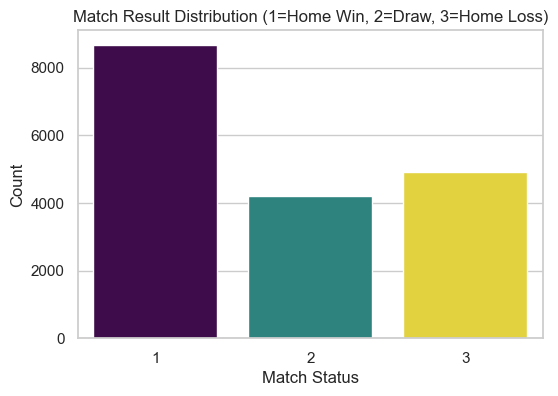

In [4328]:
plt.figure(figsize=(6,4))
sns.countplot(x='status', hue='status', data=df, palette='viridis', legend=False)
plt.title("Match Result Distribution (1=Home Win, 2=Draw, 3=Home Loss)")
plt.xlabel("Match Status")
plt.ylabel("Count")
plt.show()

In [ ]:
# Select numerical features starting with 'dif_'
numerical_features = [col for col in df.columns if col.startswith('dif_')]
print("\nNumerical features selected:")
print(numerical_features)

# Summary statistics
print(df[numerical_features].describe())
print("\nDescriptive statistics of numerical features:")


Numerical features selected:
['dif_inter_match', 'dif_inter_match_won', 'dif_inter_match_lost', 'dif_inter_match_tie', 'dif_inter_goals_sco', 'dif_inter_goals_con', 'dif_wc_match', 'dif_wc_match_won', 'dif_wc_match_lost', 'dif_wc_match_tied', 'dif_wc_goals_sco', 'dif_wc_goals_con']
       dif_inter_match  dif_inter_match_won  dif_inter_match_lost  \
count     17812.000000         17812.000000          17812.000000   
mean         39.204188            24.746407              6.269313   
std         494.412966           285.691530            118.601085   
min        -966.000000          -578.000000           -331.000000   
25%        -458.000000          -242.000000            -95.000000   
50%          62.000000            60.000000             13.000000   
75%         503.000000           268.000000            106.000000   
max         966.000000           578.000000            329.000000   

       dif_inter_match_tie  dif_inter_goals_sco  dif_inter_goals_con  \
count         17812.00

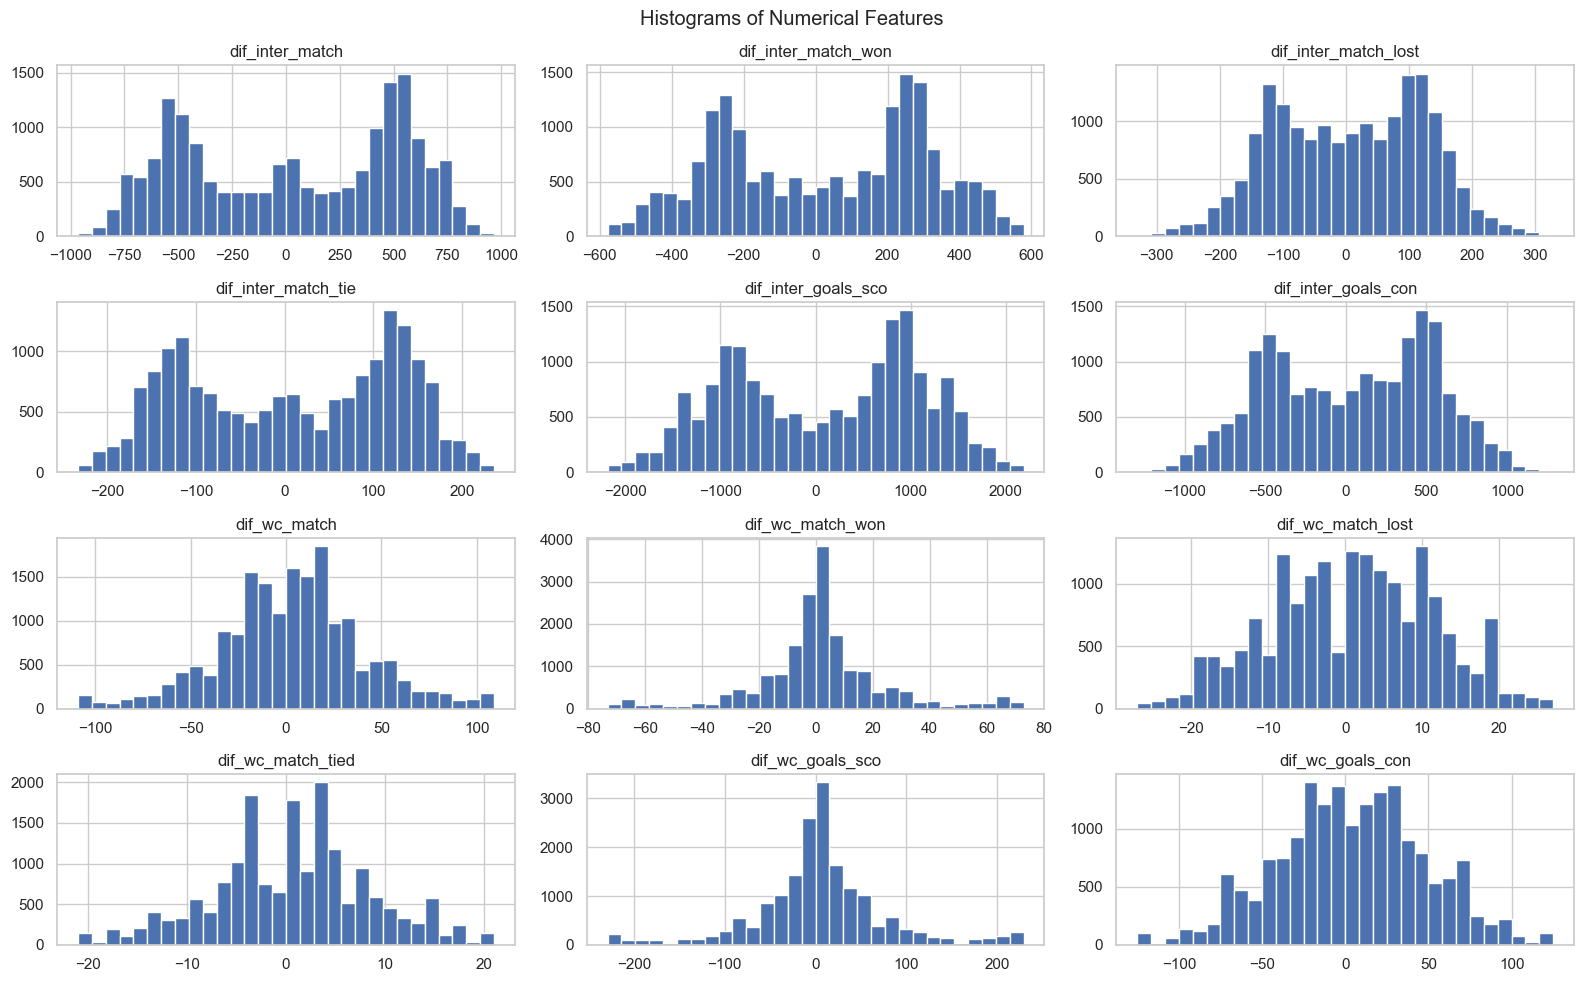

In [ ]:
# Plot histograms for numerical features
df[numerical_features].hist(figsize=(16, 10), bins=30)
plt.suptitle("Histograms of Numerical Features")
plt.tight_layout()
plt.show()

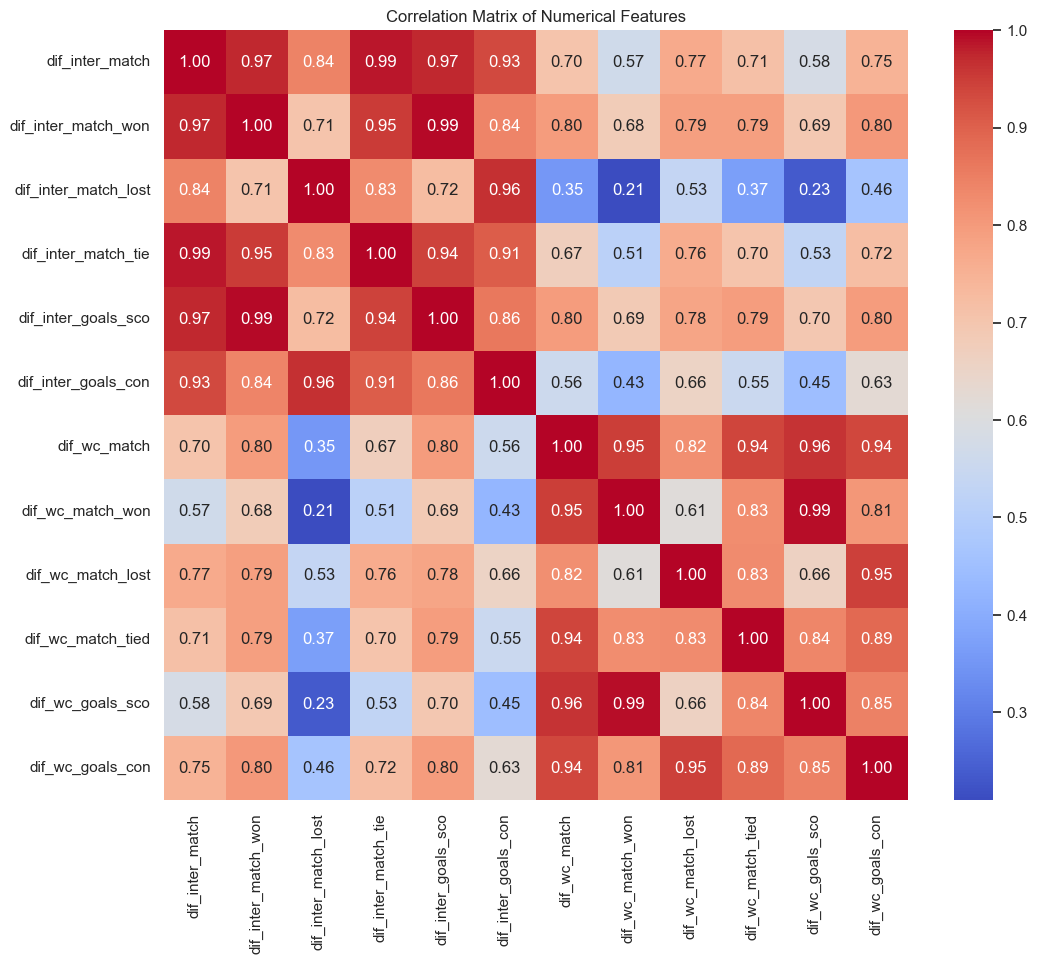

In [ ]:
# Plot correlation matrix
plt.figure(figsize=(12,10))
corr_matrix = df[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

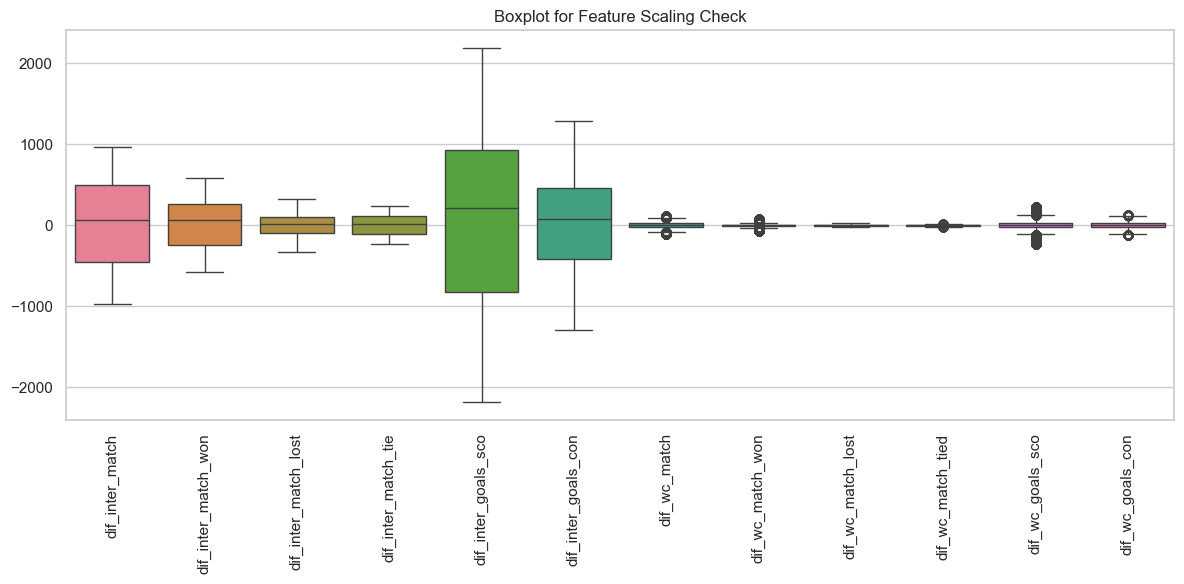

In [ ]:
# Check scales and potential outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_features])
plt.title("Boxplot for Feature Scaling Check")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [4333]:
def normalize(series, mean=None, std=None):
    series = pd.to_numeric(series, errors='coerce')
    if mean is None: mean = series.mean()
    if std is None: std = series.std()
    return (series - mean) / std

In [4334]:
cols_to_normalize = [
    'dif_inter_match', 'dif_inter_match_won', 'dif_inter_match_lost',
    'dif_inter_match_tie', 'dif_inter_goals_sco', 'dif_inter_goals_con',
    'dif_wc_match', 'dif_wc_match_won', 'dif_wc_match_lost',
    'dif_wc_match_tied', 'dif_wc_goals_sco', 'dif_wc_goals_con'
]
for col in cols_to_normalize:
    col_norm = col + '_norm'
    mean = df.loc[df['wcm'] == 0, col].mean()
    std = df.loc[df['wcm'] == 0, col].std()
    df.loc[df['wcm'] == 0, col_norm] = normalize(df.loc[df['wcm'] == 0, col], mean, std)
    df.loc[df['wcm'] == 1, col_norm] = normalize(df.loc[df['wcm'] == 1, col], mean, std)


In [4335]:
columns_to_save = [
    'home_team', 'away_team',
    'dif_inter_match_norm',
    'dif_inter_match_won_norm',
    'dif_inter_match_lost_norm',
    'dif_inter_match_tie_norm',
    'dif_inter_goals_sco_norm',
    'dif_inter_goals_con_norm',
    'dif_wc_match_norm',
    'dif_wc_match_won_norm',
    'dif_wc_match_lost_norm',
    'dif_wc_match_tied_norm',
    'dif_wc_goals_sco_norm',
    'dif_wc_goals_con_norm',
    'wcm',
    'status'
]

In [4336]:
existing_columns = [col for col in columns_to_save if col in df.columns]
df[existing_columns].to_csv('pre_processing.csv', index=False)

In [4337]:
def augment_host_bias(df):
    df_flip = df.copy()
    dif_cols = [col for col in df.columns if col.startswith('dif_')]
    df_flip[dif_cols] = -df_flip[dif_cols]    
    df_flip['home_team'], df_flip['away_team'] = df['away_team'], df['home_team']
    df_flip['status'] = df_flip['status'].map({1: 3, 2: 2, 3: 1})
    return pd.concat([df, df_flip], ignore_index=True)

In [4338]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
df = pd.read_csv("pre_processing.csv")
# df = augment_host_bias(df)

df_train_all = df[df['wcm'] == 0]
X_all = df_train_all.drop(columns=['status', 'wcm', 'home_team', 'away_team'])
y_all = df_train_all['status'].values
y_all = y_all - 1
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.3, random_state=42, stratify=y_all)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
df_wc = df[df['wcm'] == 1].copy()
X_wc = df_wc.drop(columns=['status', 'wcm', 'home_team', 'away_team'])
X_wc = scaler.transform(X_wc)
y_wc = df_wc['status'].values
y_wc = y_wc - 1


In [4339]:
import torch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)
X_wc_tensor = torch.tensor(X_wc, dtype=torch.float32)
y_wc_tensor = torch.tensor(y_wc, dtype=torch.long)

In [4340]:
input_size = X_train_tensor.shape[1]
num_classes = len(torch.unique(y_train_tensor))
print(input_size)
print(num_classes)


12
3


In [4341]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, num_classes)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [4342]:
hidden_size = 64
model = MLP(input_size=input_size, hidden_size=hidden_size, num_classes=num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [10/100], Loss: 0.9963
Epoch [20/100], Loss: 0.9631
Epoch [30/100], Loss: 0.9591
Epoch [40/100], Loss: 0.9554
Epoch [50/100], Loss: 0.9538
Epoch [60/100], Loss: 0.9521
Epoch [70/100], Loss: 0.9506
Epoch [80/100], Loss: 0.9493
Epoch [90/100], Loss: 0.9481
Epoch [100/100], Loss: 0.9469


Test Accuracy: 56.48%


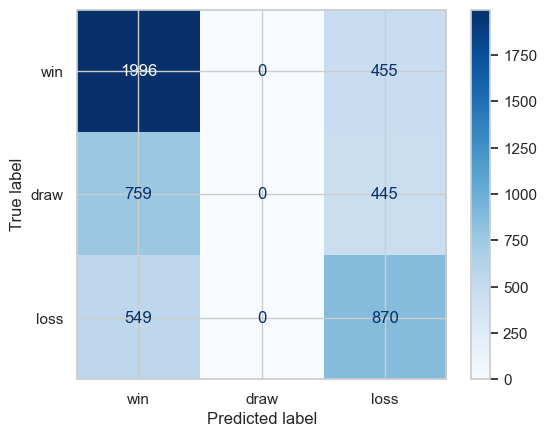

In [4343]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    predicted = torch.argmax(outputs, dim=1)
    accuracy = (predicted == y_test_tensor).float().mean()
    print(f"Test Accuracy: {accuracy.item() * 100:.2f}%")
    y_true = y_test_tensor.numpy()
    y_pred = predicted.numpy()
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["win", "draw", "loss"])
    disp.plot(cmap="Blues", values_format="d")


In [4344]:
group_teams = {
    "Group A": ["Qatar", "Ecuador", "Senegal", "Netherlands"],
    "Group B": ["England", "Iran", "United States", "Wales"],
    "Group C": ["Argentina", "Saudi Arabia", "Mexico", "Poland"],
    "Group D": ["France", "Australia", "Denmark", "Tunisia"],
    "Group E": ["Spain", "Costa Rica", "Germany", "Japan"],
    "Group F": ["Belgium", "Canada", "Morocco", "Croatia"],
    "Group G": ["Brazil", "Serbia", "Switzerland", "Cameroon"],
    "Group H": ["Portugal", "Ghana", "Uruguay", "South Korea"],
}

In [4345]:
from itertools import combinations
matches = []
for group, teams in group_teams.items():
    for team1, team2 in combinations(teams, 2):
        matches.append((team1, team2))
print(matches)
print(len(matches))

[('Qatar', 'Ecuador'), ('Qatar', 'Senegal'), ('Qatar', 'Netherlands'), ('Ecuador', 'Senegal'), ('Ecuador', 'Netherlands'), ('Senegal', 'Netherlands'), ('England', 'Iran'), ('England', 'United States'), ('England', 'Wales'), ('Iran', 'United States'), ('Iran', 'Wales'), ('United States', 'Wales'), ('Argentina', 'Saudi Arabia'), ('Argentina', 'Mexico'), ('Argentina', 'Poland'), ('Saudi Arabia', 'Mexico'), ('Saudi Arabia', 'Poland'), ('Mexico', 'Poland'), ('France', 'Australia'), ('France', 'Denmark'), ('France', 'Tunisia'), ('Australia', 'Denmark'), ('Australia', 'Tunisia'), ('Denmark', 'Tunisia'), ('Spain', 'Costa Rica'), ('Spain', 'Germany'), ('Spain', 'Japan'), ('Costa Rica', 'Germany'), ('Costa Rica', 'Japan'), ('Germany', 'Japan'), ('Belgium', 'Canada'), ('Belgium', 'Morocco'), ('Belgium', 'Croatia'), ('Canada', 'Morocco'), ('Canada', 'Croatia'), ('Morocco', 'Croatia'), ('Brazil', 'Serbia'), ('Brazil', 'Switzerland'), ('Brazil', 'Cameroon'), ('Serbia', 'Switzerland'), ('Serbia', 'Ca

In [ ]:

# group_matches = [
#     # Group A
#     ("Ecuador", "Qatar"), ("Senegal", "Netherlands"), ("Senegal", "Qatar"),
#     ("Netherlands", "Ecuador"), ("Netherlands", "Qatar"), ("Ecuador", "Senegal"),
#     # Group B
#     ("England", "Iran"), ("United States", "Wales"), ("England", "United States"),
#     ("Wales", "Iran"), ("Wales", "England"), ("Iran", "United States"),
#     # Group C
#     ("Argentina", "Saudi Arabia"), ("Mexico", "Poland"), ("Poland", "Saudi Arabia"),
#     ("Argentina", "Mexico"), ("Poland", "Argentina"), ("Saudi Arabia", "Mexico"),
#     # Group D
#     ("France", "Australia"), ("Denmark", "Tunisia"), ("France", "Denmark"),
#     ("Tunisia", "Australia"), ("Australia", "Denmark"), ("Tunisia", "France"),
#     # Group E
#     ("Spain", "Costa Rica"), ("Germany", "Japan"), ("Japan", "Costa Rica"),
#     ("Spain", "Germany"), ("Japan", "Spain"), ("Costa Rica", "Germany"),
#     # Group F
#     ("Belgium", "Canada"), ("Morocco", "Croatia"), ("Belgium", "Morocco"),
#     ("Croatia", "Canada"), ("Croatia", "Belgium"), ("Canada", "Morocco"),
#     # Group G
#     ("Switzerland", "Cameroon"), ("Brazil", "Serbia"), ("Cameroon", "Serbia"),
#     ("Brazil", "Switzerland"), ("Serbia", "Switzerland"), ("Cameroon", "Brazil"),
#     # Group H
#     ("Uruguay", "South Korea"), ("Portugal", "Ghana"), ("South Korea", "Ghana"),
#     ("Portugal", "Uruguay"), ("South Korea", "Portugal"), ("Ghana", "Uruguay"),
# ]


In [ ]:

model.eval()
wc_results = []


with torch.no_grad():
    for team1, team2 in matches:
        rows_home = df_wc[(df_wc['home_team'] == team1) & (df_wc['away_team'] == team2) & (df_wc['wcm'] == 1)]
        rows_away = df_wc[(df_wc['home_team'] == team2) & (df_wc['away_team'] == team1) & (df_wc['wcm'] == 1)]
        rows = pd.concat([rows_home, rows_away])

        if not rows.empty:
            X = rows.drop(columns=['home_team', 'away_team', 'wcm', 'status'], errors='ignore')
            X_tensor = torch.tensor(X.values, dtype=torch.float32)
            outputs = model(X_tensor)
            probs = torch.softmax(outputs, dim=1)
            avg_probs = probs.mean(dim=0)
            pred = torch.argmax(avg_probs).item()
            source = "Model"
        else:
            probs = torch.tensor([0.35, 0.3, 0.35])
            pred = random.choices([0, 1, 2], weights=probs, k=1)[0]
            avg_probs = probs
            source = "Random"

        if pred == 0:
            result = f"{team1} wins"
        elif pred == 1:
            result = "Draw"
        else:
            result = f"{team2} wins"

        print(f"{team1} vs {team2}: {source} prediction → {result} | probs = {avg_probs.numpy().round(3)}")

        wc_results.append({
            'home_team': team1,
            'away_team': team2,
            'predicted_status': pred
        })


📊 پیش‌بینی نتایج بازی‌ها با مدل یا رندوم:

Qatar vs Ecuador: Random prediction → Draw | probs = [0.35 0.3  0.35]
Qatar vs Senegal: Random prediction → Qatar wins | probs = [0.35 0.3  0.35]
Qatar vs Netherlands: Random prediction → Qatar wins | probs = [0.35 0.3  0.35]
Ecuador vs Senegal: Random prediction → Ecuador wins | probs = [0.35 0.3  0.35]
Ecuador vs Netherlands: Random prediction → Netherlands wins | probs = [0.35 0.3  0.35]
Senegal vs Netherlands: Random prediction → Netherlands wins | probs = [0.35 0.3  0.35]
England vs Iran: Random prediction → Iran wins | probs = [0.35 0.3  0.35]
England vs United States: Model prediction → England wins | probs = [0.459 0.261 0.28 ]
England vs Wales: Random prediction → England wins | probs = [0.35 0.3  0.35]
Iran vs United States: Model prediction → Iran wins | probs = [0.503 0.26  0.236]
Iran vs Wales: Random prediction → Draw | probs = [0.35 0.3  0.35]
United States vs Wales: Random prediction → United States wins | probs = [0.35 0.3  0

In [ ]:
wc_df = pd.DataFrame(wc_results)
from collections import defaultdict

group_points = {
    group: {team: {'points': 0, 'wins': 0, 'draws': 0, 'losses': 0}
            for team in teams}
    for group, teams in group_teams.items()
}

for _, row in wc_df.iterrows():
    home = row['home_team']
    away = row['away_team']
    pred = row['predicted_status']
    group = next((g for g, teams in group_teams.items() if home in teams and away in teams), None)
    if group is None:
        continue

    if pred == 0:
        group_points[group][home]['points'] += 3
        group_points[group][home]['wins'] += 1
        group_points[group][away]['losses'] += 1
    elif pred == 1:
        group_points[group][home]['points'] += 1
        group_points[group][away]['points'] += 1
        group_points[group][home]['draws'] += 1
        group_points[group][away]['draws'] += 1
    else:
        group_points[group][away]['points'] += 3
        group_points[group][away]['wins'] += 1
        group_points[group][home]['losses'] += 1

qualified_teams = []

for group, team_stats in group_points.items():
    print(f"\n📌 Group {group} standings:")
    sorted_teams = sorted(
        team_stats.items(),
        key=lambda x: (-x[1]['points'], -x[1]['wins'])
    )
    for team, stats in sorted_teams:
        print(f"{team}: {stats['points']} pts (W:{stats['wins']} D:{stats['draws']} L:{stats['losses']})")
    
    top2 = [team for team, _ in sorted_teams[:2]]
    qualified_teams.extend(top2)

print("\n✅ Teams qualified to the knockout stage:")
print(qualified_teams)


📌 Group Group A standings:
Qatar: 7 pts (W:2 D:1 L:0)
Netherlands: 6 pts (W:2 D:0 L:1)
Ecuador: 4 pts (W:1 D:1 L:1)
Senegal: 0 pts (W:0 D:0 L:3)

📌 Group Group B standings:
Iran: 7 pts (W:2 D:1 L:0)
England: 6 pts (W:2 D:0 L:1)
United States: 3 pts (W:1 D:0 L:2)
Wales: 1 pts (W:0 D:1 L:2)

📌 Group Group C standings:
Argentina: 9 pts (W:3 D:0 L:0)
Saudi Arabia: 4 pts (W:1 D:1 L:1)
Poland: 3 pts (W:1 D:0 L:2)
Mexico: 1 pts (W:0 D:1 L:2)

📌 Group Group D standings:
France: 9 pts (W:3 D:0 L:0)
Australia: 4 pts (W:1 D:1 L:1)
Tunisia: 2 pts (W:0 D:2 L:1)
Denmark: 1 pts (W:0 D:1 L:2)

📌 Group Group E standings:
Spain: 7 pts (W:2 D:1 L:0)
Japan: 4 pts (W:1 D:1 L:1)
Costa Rica: 3 pts (W:1 D:0 L:2)
Germany: 3 pts (W:1 D:0 L:2)

📌 Group Group F standings:
Canada: 9 pts (W:3 D:0 L:0)
Croatia: 6 pts (W:2 D:0 L:1)
Belgium: 3 pts (W:1 D:0 L:2)
Morocco: 0 pts (W:0 D:0 L:3)

📌 Group Group G standings:
Brazil: 6 pts (W:2 D:0 L:1)
Serbia: 6 pts (W:2 D:0 L:1)
Switzerland: 6 pts (W:2 D:0 L:1)
Cameroon: 0 

In [ ]:
import torch
import pandas as pd
import random
import numpy as np

def find_match_row(df, home, away):
    cond1 = (df['home_team'] == home) & (df['away_team'] == away)
    cond2 = (df['home_team'] == away) & (df['away_team'] == home)
    match = df[cond1 | cond2]
    return match.iloc[0:1] if not match.empty else None


def predict_knockout_winner(model, df, home, away):
    row = find_match_row(df, home, away)
    
    if row is None or len(row) == 0:
        dummy_features = [random.uniform(-1, 1) for _ in range(len(df.columns) - 4)]
        row = pd.DataFrame([dummy_features], columns=df.drop(columns=['home_team', 'away_team', 'wcm', 'status']).columns)
    else:
        row = row.drop(columns=['home_team', 'away_team', 'wcm', 'status'], errors='ignore')

    X_tensor = torch.tensor(row.values.astype(np.float32)) 

    model.eval()
    with torch.no_grad():
        output = model(X_tensor)
        probs = torch.softmax(output, dim=1)
        pred = torch.argmax(probs, dim=1).item()

    if pred == 0:
        return home
    elif pred == 2:
        return away
    else:
        return random.choice([home, away])


print("\n🔰 Round of 16:")
knockout_winners = []
for home, away in round_of_16_matches:
    winner = predict_knockout_winner(model, df_wc, home, away)
    print(f"{home} vs {away} → Winner: {winner}")
    knockout_winners.append(winner)

print("\n🏆 Quarter Finals:")
quarter_final_matches = [
    (knockout_winners[0], knockout_winners[1]),
    (knockout_winners[2], knockout_winners[3]),
    (knockout_winners[4], knockout_winners[5]),
    (knockout_winners[6], knockout_winners[7]),
]
qf_winners = []
for home, away in quarter_final_matches:
    winner = predict_knockout_winner(model, df_wc, home, away)
    print(f"{home} vs {away} → Winner: {winner}")
    qf_winners.append(winner)

print("\n🥇 Semi Finals:")
semi_final_matches = [
    (qf_winners[0], qf_winners[1]),
    (qf_winners[2], qf_winners[3]),
]
sf_winners = []
losers = []
for home, away in semi_final_matches:
    winner = predict_knockout_winner(model, df_wc, home, away)
    loser = away if winner == home else home
    print(f"{home} vs {away} → Winner: {winner}")
    sf_winners.append(winner)
    losers.append(loser)

print("\n🥉 3rd Place Match:")
third_place = predict_knockout_winner(model, df_wc, losers[0], losers[1])
print(f"{losers[0]} vs {losers[1]} → Winner (3rd Place): {third_place}")

print("\n🏆 Final:")
champion = predict_knockout_winner(model, df_wc, sf_winners[0], sf_winners[1])
print(f"{sf_winners[0]} vs {sf_winners[1]} → Winner: {champion}")

print(f"\n🏅 Champion of the World Cup: {champion}")
print(f"🥈 Runner-up: {sf_winners[0] if sf_winners[1] == champion else sf_winners[1]}")
print(f"🥉 Third Place: {third_place}")



🔰 Round of 16:
Netherlands vs Iran → Winner: Netherlands
Argentina vs Australia → Winner: Argentina
Japan vs Morocco → Winner: Japan
Brazil vs Ghana → Winner: Brazil
England vs Ecuador → Winner: England
France vs Poland → Winner: Poland
Belgium vs Spain → Winner: Belgium
Portugal vs Serbia → Winner: Portugal

🏆 Quarter Finals:
Netherlands vs Argentina → Winner: Argentina
Japan vs Brazil → Winner: Brazil
England vs Poland → Winner: England
Belgium vs Portugal → Winner: Belgium

🥇 Semi Finals:
Argentina vs Brazil → Winner: Argentina
England vs Belgium → Winner: England

🥉 3rd Place Match:
Brazil vs Belgium → Winner (3rd Place): Brazil

🏆 Final:
Argentina vs England → Winner: Argentina

🏅 Champion of the World Cup: Argentina
🥈 Runner-up: England
🥉 Third Place: Brazil


Under what conditions is MLP equivalent to Logistic Regression?

اینکه مدل ما فقط یک لایه داشته باشه و لایه پنهان نداشته باشه و ورودی ها مستقیم به خروجی متصل باشند
تابع فعال‌سازی خروجی، سیگموید (برای کلاس‌بندی دودویی) یا برای چند کلاسه باشه
تابع  لوز فانکشن همان تابع کراس انتروپی باشد